## Part 1 - Calculations

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

# Define the data points
points = np.array([
    [3, 6],  # A1
    [6, 3],  # A2
    [8, 6],  # A3
    [2, 1],  # A4
    [5, 9]   # A5
])

# Initial centroids (A2 and A4)
initial_centroids = np.array([
    [6, 3],  # C1 (A2)
    [2, 1]   # C2 (A4)
])


In [10]:
# Function to calculate Euclidean distance
def euclidean_distance(p1, p2):
    return np.sqrt(np.sum((p1 - p2) ** 2))

# Assign points to clusters based on distance to initial centroids
cluster_labels = []
for point in points:
    dist_to_c1 = euclidean_distance(point, initial_centroids[0])
    dist_to_c2 = euclidean_distance(point, initial_centroids[1])
    cluster_labels.append(0 if dist_to_c1 < dist_to_c2 else 1)
cluster_labels = np.array(cluster_labels)

# Calculate new centroids
cluster1_points = points[cluster_labels == 0]
cluster2_points = points[cluster_labels == 1]
new_centroids = np.array([
    np.mean(cluster1_points, axis=0),
    np.mean(cluster2_points, axis=0)
])

print("\nCluster 1 points:", cluster1_points)
print("New centroid 1:", new_centroids[0])
print("\nCluster 2 points:", cluster2_points)
print("New centroid 2:", new_centroids[1])


Cluster 1 points: [[3 6]
 [6 3]
 [8 6]
 [5 9]]
New centroid 1: [5.5 6. ]

Cluster 2 points: [[2 1]]
New centroid 2: [2. 1.]



Clustering Results:
-----------------
Distances from points to initial centroids:

Point A1 (3, 6):
Distance to C1 (A2): 4.24
Distance to C2 (A4): 5.10
Assigned to Cluster: 1

Point A2 (6, 3):
Distance to C1 (A2): 0.00
Distance to C2 (A4): 4.47
Assigned to Cluster: 1

Point A3 (8, 6):
Distance to C1 (A2): 3.61
Distance to C2 (A4): 7.81
Assigned to Cluster: 1

Point A4 (2, 1):
Distance to C1 (A2): 4.47
Distance to C2 (A4): 0.00
Assigned to Cluster: 2

Point A5 (5, 9):
Distance to C1 (A2): 6.08
Distance to C2 (A4): 8.54
Assigned to Cluster: 1

New centroids:
Cluster 1: (5.50, 6.00)
Cluster 2: (2.00, 1.00)


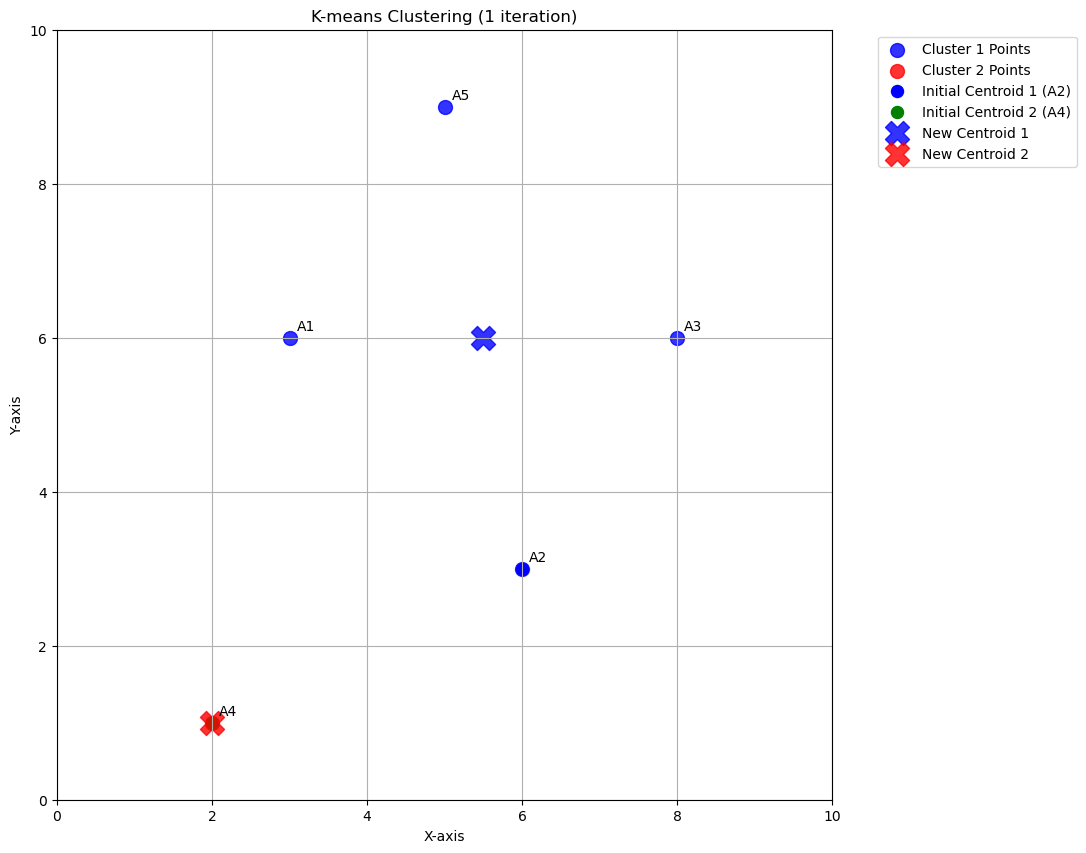

In [11]:
# Create visualization
plt.figure(figsize=(10, 10))
plt.grid(True)

# Plot points for each cluster
plt.scatter(points[cluster_labels == 0][:, 0], points[cluster_labels == 0][:, 1], 
           c='blue', s=100, alpha=0.8, label='Cluster 1 Points')
plt.scatter(points[cluster_labels == 1][:, 0], points[cluster_labels == 1][:, 1], 
           c='red', s=100, alpha=0.8, label='Cluster 2 Points')

# Plot initial centroids with squares
plt.scatter(initial_centroids[0:1, 0], initial_centroids[0:1, 1], 
           c='blue', marker='.', s=300, facecolors='none', 
           label='Initial Centroid 1 (A2)')
plt.scatter(initial_centroids[1:2, 0], initial_centroids[1:2, 1], 
           c='green', marker='.', s=300, facecolors='none', 
           label='Initial Centroid 2 (A4)')

# Plot new centroids with stars and slight offset for Cluster 2
plt.scatter(new_centroids[0:1, 0], new_centroids[0:1, 1], 
           c='blue', marker='X', s=300, alpha=0.8,
           label='New Centroid 1')
plt.scatter(new_centroids[1:2, 0], new_centroids[1:2, 1], 
           c='red', marker='X', s=300, alpha=0.8,
           label='New Centroid 2')

# Add point labels
for i, (x, y) in enumerate(points):
    plt.annotate(f'A{i+1}', (x, y), xytext=(5, 5), textcoords='offset points')

# Set plot limits and labels
plt.xlim(0, 10)
plt.ylim(0, 10)
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('K-means Clustering (1 iteration)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Print results
print("\nClustering Results:")
print("-----------------")
print("Distances from points to initial centroids:")
for i, point in enumerate(points):
    dist_to_c1 = euclidean_distance(point, initial_centroids[0])
    dist_to_c2 = euclidean_distance(point, initial_centroids[1])
    print(f"\nPoint A{i+1} ({point[0]}, {point[1]}):")
    print(f"Distance to C1 (A2): {dist_to_c1:.2f}")
    print(f"Distance to C2 (A4): {dist_to_c2:.2f}")
    print(f"Assigned to Cluster: {cluster_labels[i] + 1}")

print("\nNew centroids:")
for i, centroid in enumerate(new_centroids):
    print(f"Cluster {i + 1}: ({centroid[0]:.2f}, {centroid[1]:.2f})")

## Part 2 - Programming

In [20]:
import pandas as pd
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, f1_score
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

# Read the Excel file
df = pd.read_csv('MCSDatasetNEXTCONLab.csv')

In [21]:
'''Split into test-train sets'''

# Features and target
features = ['Latitude', 'Longitude', 'Hour', 'Minute', 'Duration', 
           'RemainingTime', 'Resources', 'Coverage', 'OnPeakHours', 'GridNumber']
X = df[features]
y = df['Legitimacy']

# Split data based on Day values
X_train = X[df['Day'].isin([0, 1, 2])]
X_test = X[df['Day'] == 3]
y_train = y[df['Day'].isin([0, 1, 2])]
y_test = y[df['Day'] == 3]


In [22]:
# Create and train both models
nb_model = GaussianNB()
knn_model = KNeighborsClassifier(n_neighbors=5)  # K = 5

nb_model.fit(X_train, y_train)
knn_model.fit(X_train, y_train)

# Make predictions with both models
nb_pred = nb_model.predict(X_test)
knn_pred = knn_model.predict(X_test)

# Calculate probabilities
nb_prob = nb_model.predict_proba(X_test)
knn_prob = knn_model.predict_proba(X_test)


=== Naive Bayes Results ===

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       312
           1       0.87      1.00      0.93      2148

    accuracy                           0.87      2460
   macro avg       0.44      0.50      0.47      2460
weighted avg       0.76      0.87      0.81      2460



C:\Users\amoka\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\amoka\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\amoka\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Figure size 800x600 with 0 Axes>

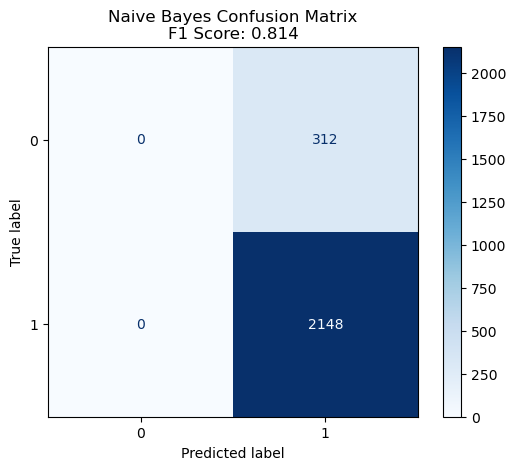


=== KNN Results ===

Classification Report:
              precision    recall  f1-score   support

           0       0.46      0.44      0.45       312
           1       0.92      0.93      0.92      2148

    accuracy                           0.86      2460
   macro avg       0.69      0.68      0.69      2460
weighted avg       0.86      0.86      0.86      2460



<Figure size 800x600 with 0 Axes>

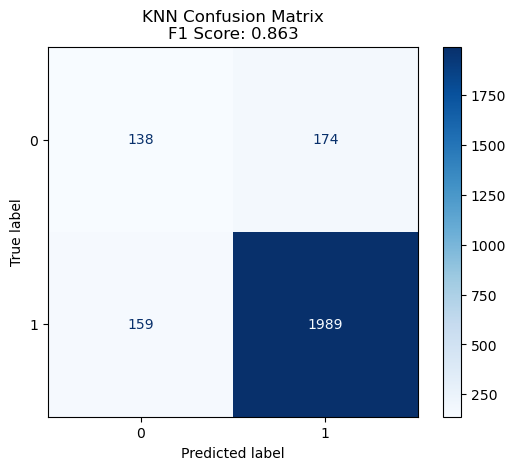


=== Overall Accuracy ===
Naive Bayes F1-score: 0.8140
KNN F1-score: 0.8632


In [23]:
# Print performance metrics for both models
print("\n=== Naive Bayes Results ===")
print("\nClassification Report:")
print(classification_report(y_test, nb_pred))

# Calculate F1 score for NB
nb_f1 = f1_score(y_test, nb_pred, average='weighted')

# Plot NB confusion matrix
plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay.from_predictions(
    y_test, 
    nb_pred,
    display_labels=['0', '1'],
    cmap='Blues'
)
plt.title(f'Naive Bayes Confusion Matrix\nF1 Score: {nb_f1:.3f}')
plt.show()

print("\n=== KNN Results ===")
print("\nClassification Report:")
print(classification_report(y_test, knn_pred))

# Calculate F1 score for KNN
knn_f1 = f1_score(y_test, knn_pred, average='weighted')

# Plot KNN confusion matrix
plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay.from_predictions(
    y_test, 
    knn_pred,
    display_labels=['0', '1'],
    cmap='Blues'
)
plt.title(f'KNN Confusion Matrix\nF1 Score: {knn_f1:.3f}')
plt.show()

# Save predictions from both models
results_df = pd.DataFrame({
    'Actual': y_test,
    'NB_Predicted': nb_pred,
    'NB_Probability_Class_0': nb_prob[:, 0],
    'NB_Probability_Class_1': nb_prob[:, 1],
    'KNN_Predicted': knn_pred,
    'KNN_Probability_Class_0': knn_prob[:, 0],
    'KNN_Probability_Class_1': knn_prob[:, 1]
})

# Compare the F1 scores
print("\n=== Overall Accuracy ===")
print(f"Naive Bayes F1-score: {nb_f1:.4f}")
print(f"KNN F1-score: {knn_f1:.4f}")

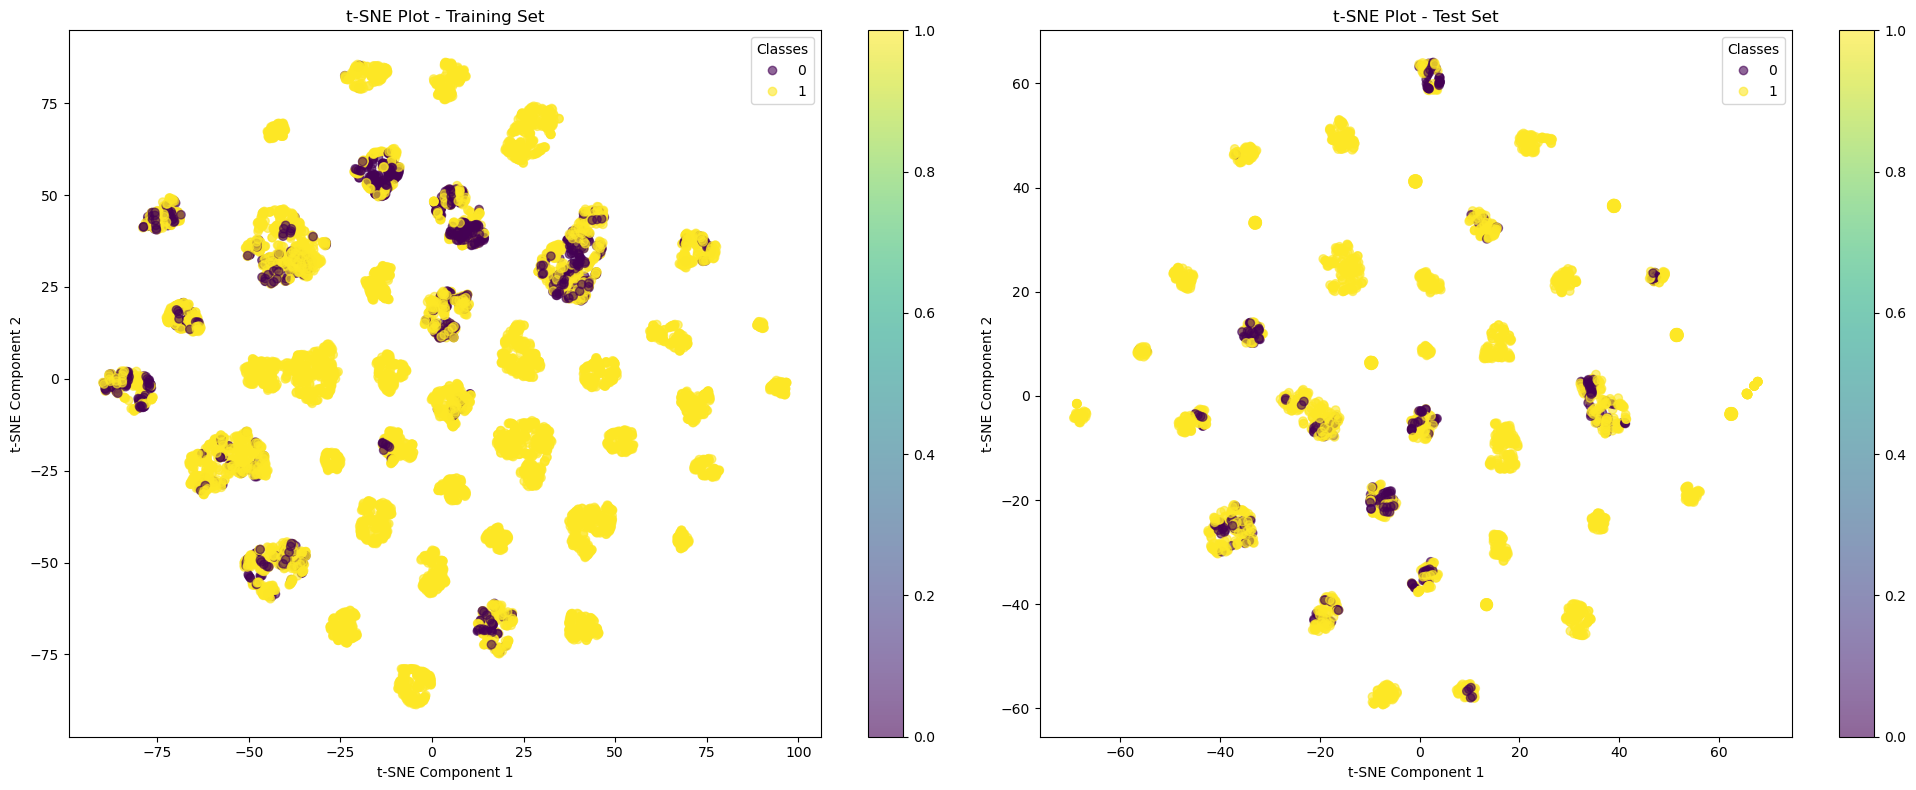

In [24]:
'''TSNE plots'''

# Create t-SNE objects
tsne = TSNE(n_components=2, random_state=0)

# Fit and transform training data
tsne_train = tsne.fit_transform(X_train)

# Transform test data
tsne_test = TSNE(n_components=2, random_state=0).fit_transform(X_test)

# Create figure with two subplots
plt.figure(figsize=(20, 8))

# Plot training data
plt.subplot(1, 2, 1)
scatter_train = plt.scatter(tsne_train[:, 0], tsne_train[:, 1], 
                          c=y_train, cmap='viridis', alpha=0.6)
plt.title('t-SNE Plot - Training Set')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.colorbar(scatter_train)
plt.legend(*scatter_train.legend_elements(), title="Classes")

# Plot test data
plt.subplot(1, 2, 2)
scatter_test = plt.scatter(tsne_test[:, 0], tsne_test[:, 1], 
                         c=y_test, cmap='viridis', alpha=0.6)
plt.title('t-SNE Plot - Test Set')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.colorbar(scatter_test)
plt.legend(*scatter_test.legend_elements(), title="Classes")

plt.tight_layout()
plt.show()

## Part 3 - Dimensionality Reduction & Analysis

77/77 [==============================] - 0s 721us/step


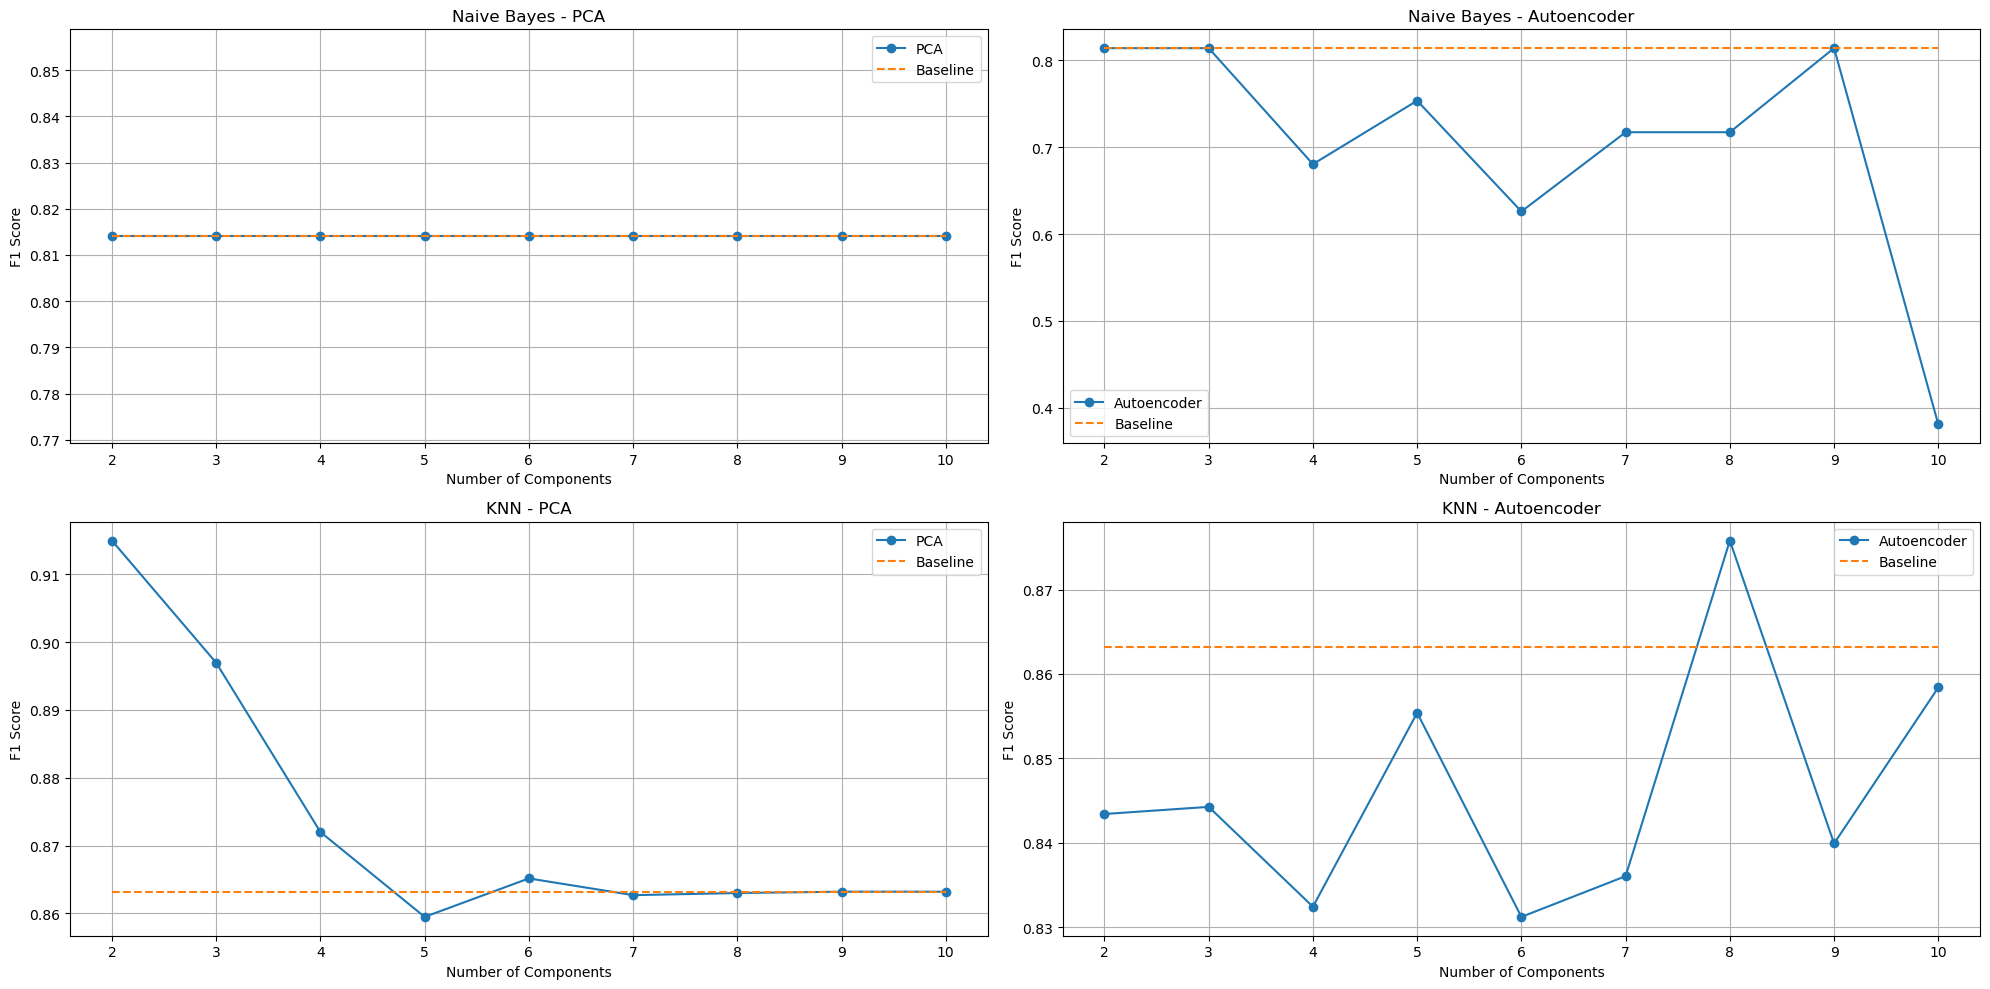


Maximum F1 Scores:
--------------------------------------------------
Naive Bayes Baseline: 0.8140
Naive Bayes with PCA: 0.8140 (components: 2)
Naive Bayes with Autoencoder: 0.8140 (components: 2)
--------------------------------------------------
KNN Baseline: 0.8632
KNN with PCA: 0.9150 (components: 2)
KNN with Autoencoder: 0.8758 (components: 8)
--------------------------------------------------

Best overall technique: KNN PCA with F1 score of 0.9150


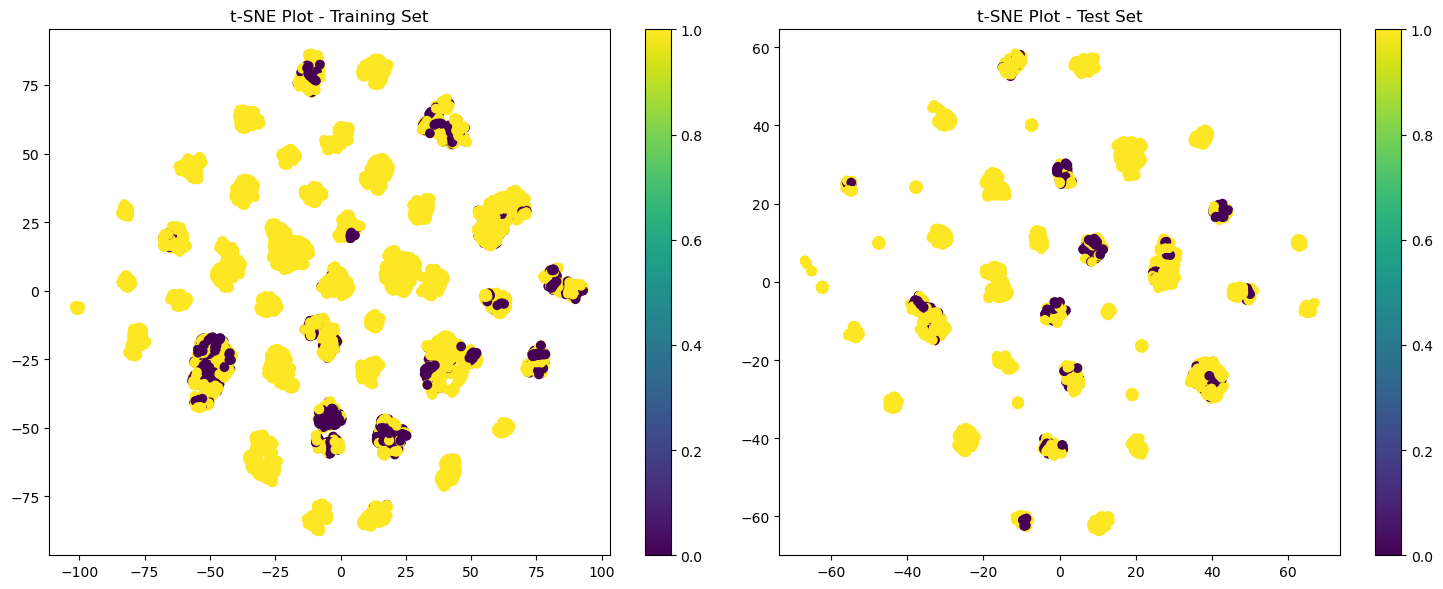

In [14]:
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
import pandas as pd
import seaborn as sns
from sklearn.manifold import TSNE


# Read the Excel file
df = pd.read_csv('MCSDatasetNEXTCONLab.csv')

# Features and target
features = ['Latitude', 'Longitude', 'Hour', 'Minute', 'Duration', 
           'RemainingTime', 'Resources', 'Coverage', 'OnPeakHours', 'GridNumber']
X = df[features]
y = df['Legitimacy']

# Split data based on Day values
X_train = X[df['Day'].isin([0, 1, 2])]
X_test = X[df['Day'] == 3]
y_train = y[df['Day'].isin([0, 1, 2])]
y_test = y[df['Day'] == 3]

# 2. Define Autoencoder Model Creation Function
def create_autoencoder(input_dim, encoding_dim):
    # Encoder
    input_layer = tf.keras.layers.Input(shape=(input_dim,))
    encoder = tf.keras.layers.Dense(encoding_dim, activation='relu')(input_layer)
    
    # Decoder
    decoder = tf.keras.layers.Dense(input_dim, activation='sigmoid')(encoder)
    
    # Full autoencoder
    autoencoder = tf.keras.Model(input_layer, decoder)
    
    # Encoder model
    encoder_model = tf.keras.Model(input_layer, encoder)
    
    # Compile
    autoencoder.compile(optimizer='adam', loss='mse')
    
    return autoencoder, encoder_model

# 3. Function to get reduced features using Autoencoder
def get_ae_features(X_train, X_test, n_components):
    autoencoder, encoder = create_autoencoder(X_train.shape[1], n_components)
    
    # Train autoencoder
    autoencoder.fit(X_train, X_train, 
                   epochs=50, 
                   batch_size=32, 
                   shuffle=False, 
                   verbose=0)
    
    # Get encoded features
    X_train_ae = encoder.predict(X_train)
    X_test_ae = encoder.predict(X_test)
    
    return X_train_ae, X_test_ae

# 4. Function to evaluate classifiers
def evaluate_classifier(clf, X_train, X_test, y_train, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    return f1_score(y_test, y_pred, average='weighted')

# 5. Perform Analysis
# Define range of components to test
n_components_range = range(2, 11)

# Initialize results dictionaries
results_nb = {'baseline': [], 'pca': [], 'ae': []}
results_knn = {'baseline': [], 'pca': [], 'ae': []}

# Baseline classifiers
nb_baseline = GaussianNB()
knn_baseline = KNeighborsClassifier(n_neighbors=5)

baseline_nb_score = evaluate_classifier(nb_baseline, X_train, X_test, y_train, y_test)
baseline_knn_score = evaluate_classifier(knn_baseline, X_train, X_test, y_train, y_test)

# Test different numbers of components
for n_comp in n_components_range:
    # PCA
    pca = PCA(n_components=n_comp)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)
    
    # Autoencoder
    X_train_ae, X_test_ae = get_ae_features(X_train, X_test, n_comp)
    
    # Evaluate with Naive Bayes
    nb_pca = evaluate_classifier(GaussianNB(), X_train_pca, X_test_pca, y_train, y_test)
    nb_ae = evaluate_classifier(GaussianNB(), X_train_ae, X_test_ae, y_train, y_test)
    
    # Evaluate with KNN
    knn_pca = evaluate_classifier(KNeighborsClassifier(n_neighbors=5), X_train_pca, X_test_pca, y_train, y_test)
    knn_ae = evaluate_classifier(KNeighborsClassifier(n_neighbors=5), X_train_ae, X_test_ae, y_train, y_test)
    
    # Store results
    results_nb['pca'].append(nb_pca)
    results_nb['ae'].append(nb_ae)
    results_nb['baseline'].append(baseline_nb_score)
    
    results_knn['pca'].append(knn_pca)
    results_knn['ae'].append(knn_ae)
    results_knn['baseline'].append(baseline_knn_score)

# 6. Plotting Results
plt.figure(figsize=(20, 10))

# Plot for Naive Bayes - PCA
plt.subplot(2, 2, 1)
plt.plot(list(n_components_range), results_nb['pca'], marker='o', label='PCA')
plt.plot(list(n_components_range), results_nb['baseline'], '--', label='Baseline')
plt.title('Naive Bayes - PCA')
plt.xlabel('Number of Components')
plt.ylabel('F1 Score')
plt.legend()
plt.grid(True)

# Plot for Naive Bayes - Autoencoder
plt.subplot(2, 2, 2)
plt.plot(list(n_components_range), results_nb['ae'], marker='o', label='Autoencoder')
plt.plot(list(n_components_range), results_nb['baseline'], '--', label='Baseline')
plt.title('Naive Bayes - Autoencoder')
plt.xlabel('Number of Components')
plt.ylabel('F1 Score')
plt.legend()
plt.grid(True)

# Plot for KNN - PCA
plt.subplot(2, 2, 3)
plt.plot(list(n_components_range), results_knn['pca'], marker='o', label='PCA')
plt.plot(list(n_components_range), results_knn['baseline'], '--', label='Baseline')
plt.title('KNN - PCA')
plt.xlabel('Number of Components')
plt.ylabel('F1 Score')
plt.legend()
plt.grid(True)

# Plot for KNN - Autoencoder
plt.subplot(2, 2, 4)
plt.plot(list(n_components_range), results_knn['ae'], marker='o', label='Autoencoder')
plt.plot(list(n_components_range), results_knn['baseline'], '--', label='Baseline')
plt.title('KNN - Autoencoder')
plt.xlabel('Number of Components')
plt.ylabel('F1 Score')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

### Check performance

# Find maximum scores and their corresponding number of components for NB
max_nb_pca = max(results_nb['pca'])
max_nb_pca_components = list(n_components_range)[results_nb['pca'].index(max_nb_pca)]

max_nb_ae = max(results_nb['ae'])
max_nb_ae_components = list(n_components_range)[results_nb['ae'].index(max_nb_ae)]

# Find maximum scores and their corresponding number of components for KNN
max_knn_pca = max(results_knn['pca'])
max_knn_pca_components = list(n_components_range)[results_knn['pca'].index(max_knn_pca)]

max_knn_ae = max(results_knn['ae'])
max_knn_ae_components = list(n_components_range)[results_knn['ae'].index(max_knn_ae)]

print("\nMaximum F1 Scores:")
print("-" * 50)
print(f"Naive Bayes Baseline: {baseline_nb_score:.4f}")
print(f"Naive Bayes with PCA: {max_nb_pca:.4f} (components: {max_nb_pca_components})")
print(f"Naive Bayes with Autoencoder: {max_nb_ae:.4f} (components: {max_nb_ae_components})")
print("-" * 50)
print(f"KNN Baseline: {baseline_knn_score:.4f}")
print(f"KNN with PCA: {max_knn_pca:.4f} (components: {max_knn_pca_components})")
print(f"KNN with Autoencoder: {max_knn_ae:.4f} (components: {max_knn_ae_components})")
print("-" * 50)

# Find overall best technique
all_scores = {
    'NB Baseline': baseline_nb_score,
    'NB PCA': max_nb_pca,
    'NB AE': max_nb_ae,
    'KNN Baseline': baseline_knn_score,
    'KNN PCA': max_knn_pca,
    'KNN AE': max_knn_ae
}

best_technique = max(all_scores.items(), key=lambda x: x[1])
print(f"\nBest overall technique: {best_technique[0]} with F1 score of {best_technique[1]:.4f}")



# 7. Generate t-SNE plots for the best performing technique
# PCA performed better
best_n_components = 5 
pca = PCA(n_components=best_n_components)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Apply t-SNE
tsne = TSNE(n_components=2, random_state=0)
X_train_tsne = tsne.fit_transform(X_train_pca)
X_test_tsne = tsne.fit_transform(X_test_pca)

# Plot t-SNE results
plt.figure(figsize=(15, 6))

# Training set
plt.subplot(1, 2, 1)
scatter = plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=y_train, cmap='viridis')
plt.title('t-SNE Plot - Training Set')
plt.colorbar(scatter)

# Test set
plt.subplot(1, 2, 2)
scatter = plt.scatter(X_test_tsne[:, 0], X_test_tsne[:, 1], c=y_test, cmap='viridis')
plt.title('t-SNE Plot - Test Set')
plt.colorbar(scatter)

plt.tight_layout()
plt.show()

## Part 4 - Feature Selection & Exploration

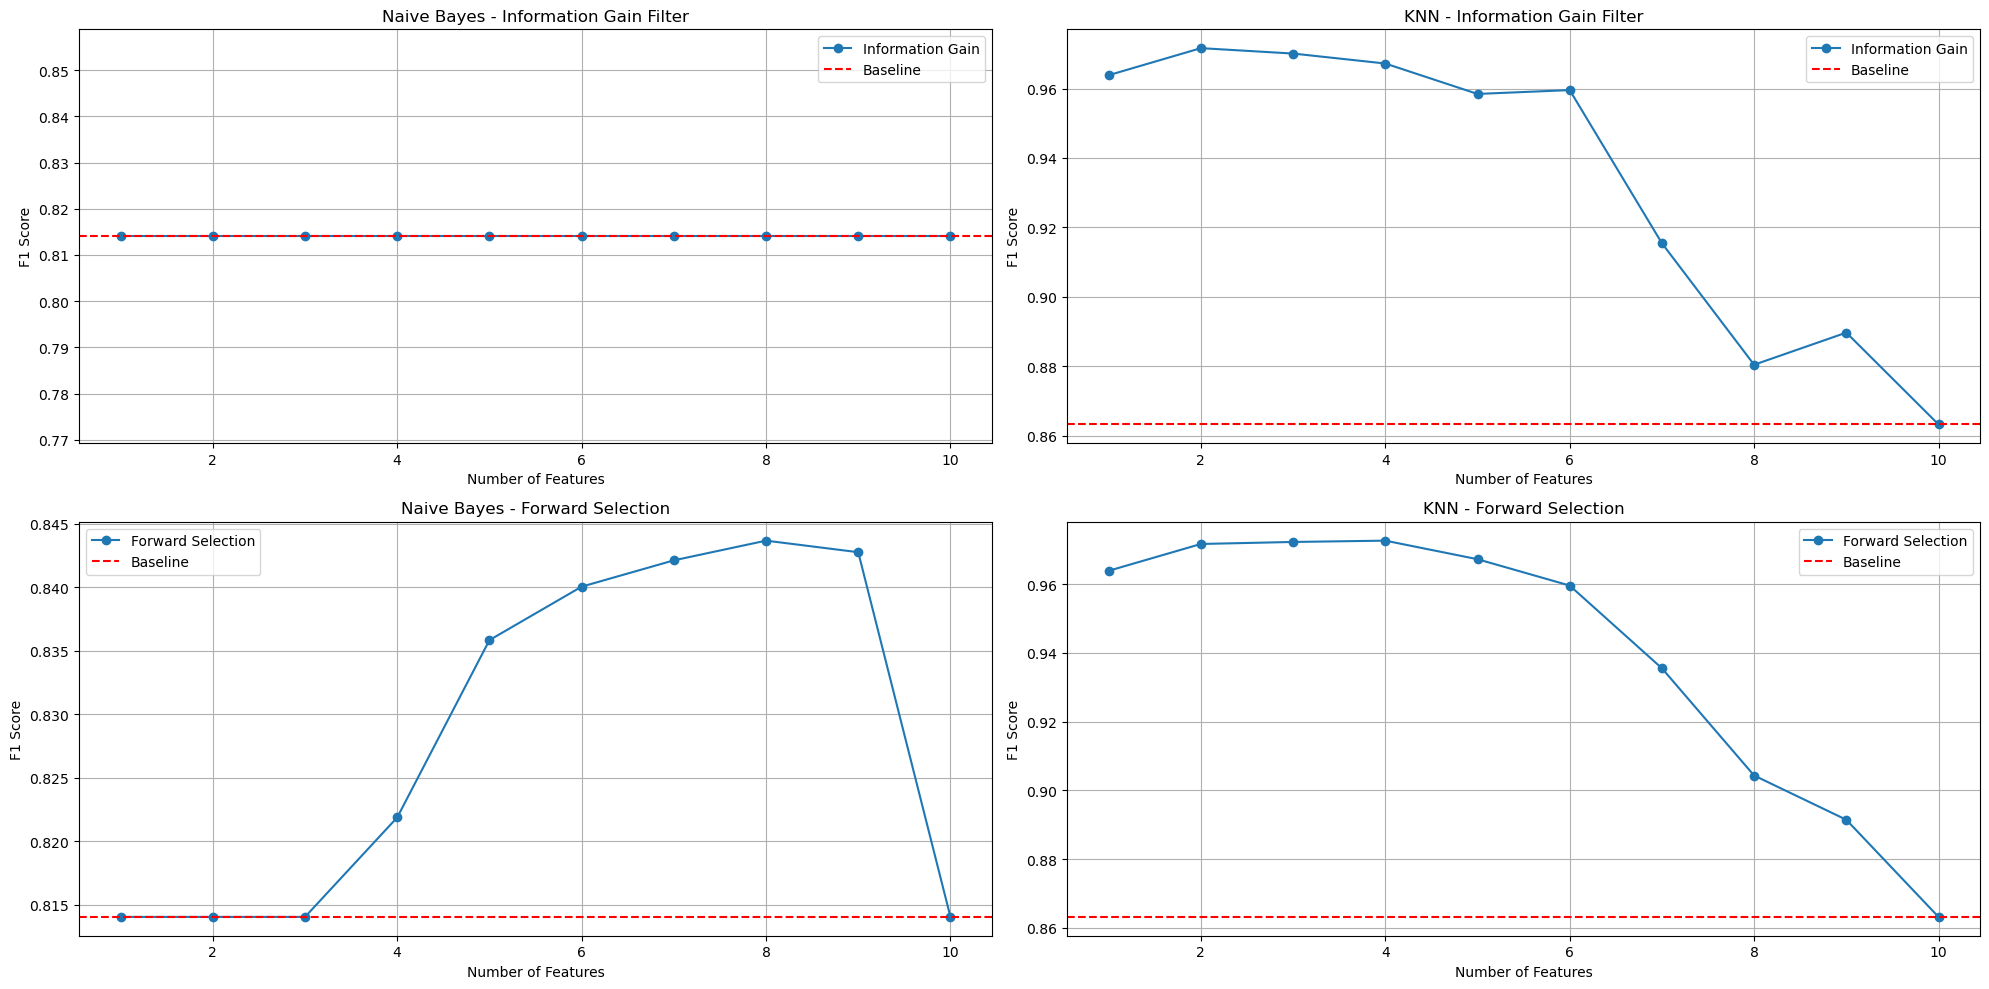


Maximum F1 Scores:
--------------------------------------------------
Naive Bayes Baseline: 0.8140
NB Information Gain: 0.8140
NB Forward Selection: 0.8437
--------------------------------------------------
KNN Baseline: 0.8632
KNN Information Gain: 0.9716
KNN Forward Selection: 0.9726
--------------------------------------------------

Best overall method: KNN Forward with F1 score of 0.9726


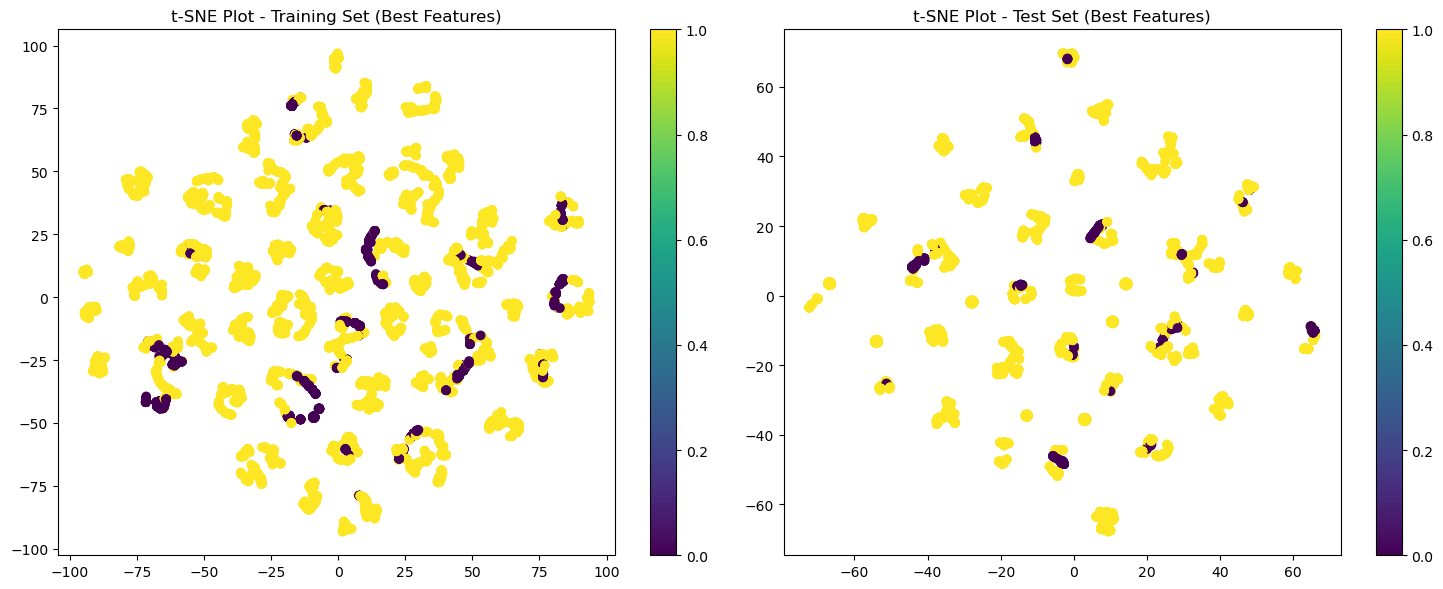


Best performing features:
1. GridNumber
2. Latitude
3. OnPeakHours
4. Longitude
5. Hour


In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_classif, VarianceThreshold
from sklearn.metrics import f1_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.manifold import TSNE
from itertools import combinations

# Read and prepare the data
df = pd.read_csv('MCSDatasetNEXTCONLab.csv')

features = ['Latitude', 'Longitude', 'Hour', 'Minute', 'Duration', 
           'RemainingTime', 'Resources', 'Coverage', 'OnPeakHours', 'GridNumber']
X = df[features]
y = df['Legitimacy']

# Split data based on Day values - no shuffling
X_train = X[df['Day'].isin([0, 1, 2])]
X_test = X[df['Day'] == 3]
y_train = y[df['Day'].isin([0, 1, 2])]
y_test = y[df['Day'] == 3]

# Function to evaluate classifier
def evaluate_classifier(clf, X_train, X_test, y_train, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    return f1_score(y_test, y_pred, average='weighted')

# Get baseline performance
nb_clf = GaussianNB()
knn_clf = KNeighborsClassifier(n_neighbors=5)
baseline_nb = evaluate_classifier(nb_clf, X_train, X_test, y_train, y_test)
baseline_knn = evaluate_classifier(knn_clf, X_train, X_test, y_train, y_test)

# Information Gain
info_gains = mutual_info_classif(X_train, y_train, random_state=0)
feature_scores = pd.DataFrame({
    'Feature': features,
    'Score': info_gains
})
feature_scores = feature_scores.sort_values('Score', ascending=False)

# Variance Threshold
var_threshold = VarianceThreshold()
var_threshold.fit(X_train)
variance_scores = pd.DataFrame({
    'Feature': features,
    'Score': var_threshold.variances_
})
variance_scores = variance_scores.sort_values('Score', ascending=False)

# Test different numbers of features using Information Gain
info_gain_results_nb = []
info_gain_results_knn = []

for n_features in range(1, len(features) + 1):
    selected_features = feature_scores['Feature'].head(n_features).tolist()
    
    # Evaluate with NB
    score_nb = evaluate_classifier(
        GaussianNB(),
        X_train[selected_features],
        X_test[selected_features],
        y_train, y_test
    )
    info_gain_results_nb.append(score_nb)
    
    # Evaluate with KNN
    score_knn = evaluate_classifier(
        KNeighborsClassifier(n_neighbors=5),
        X_train[selected_features],
        X_test[selected_features],
        y_train, y_test
    )
    info_gain_results_knn.append(score_knn)

# Forward Selection
def forward_selection(X_train, X_test, y_train, y_test, classifier):
    features_list = list(X_train.columns)
    n_features = len(features_list)
    selected_features = []
    scores = []
    
    for i in range(n_features):
        best_score = -1
        best_feature = None
        
        for feature in features_list:
            if feature not in selected_features:
                current_features = selected_features + [feature]
                score = evaluate_classifier(
                    classifier(),
                    X_train[current_features],
                    X_test[current_features],
                    y_train, y_test
                )
                
                if score > best_score:
                    best_score = score
                    best_feature = feature
        
        if best_feature is not None:
            selected_features.append(best_feature)
            scores.append(best_score)
    
    return scores, selected_features

# Apply Forward Selection
forward_scores_nb, forward_features_nb = forward_selection(
    X_train, X_test, y_train, y_test, GaussianNB
)
forward_scores_knn, forward_features_knn = forward_selection(
    X_train, X_test, y_train, y_test, KNeighborsClassifier
)

# Plot results
plt.figure(figsize=(20, 10))

# Plot Information Gain results
plt.subplot(2, 2, 1)
plt.plot(range(1, len(features) + 1), info_gain_results_nb, marker='o', label='Information Gain')
plt.axhline(y=baseline_nb, color='r', linestyle='--', label='Baseline')
plt.title('Naive Bayes - Information Gain Filter')
plt.xlabel('Number of Features')
plt.ylabel('F1 Score')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 2)
plt.plot(range(1, len(features) + 1), info_gain_results_knn, marker='o', label='Information Gain')
plt.axhline(y=baseline_knn, color='r', linestyle='--', label='Baseline')
plt.title('KNN - Information Gain Filter')
plt.xlabel('Number of Features')
plt.ylabel('F1 Score')
plt.legend()
plt.grid(True)

# Plot Forward Selection results
plt.subplot(2, 2, 3)
plt.plot(range(1, len(features) + 1), forward_scores_nb, marker='o', label='Forward Selection')
plt.axhline(y=baseline_nb, color='r', linestyle='--', label='Baseline')
plt.title('Naive Bayes - Forward Selection')
plt.xlabel('Number of Features')
plt.ylabel('F1 Score')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 4)
plt.plot(range(1, len(features) + 1), forward_scores_knn, marker='o', label='Forward Selection')
plt.axhline(y=baseline_knn, color='r', linestyle='--', label='Baseline')
plt.title('KNN - Forward Selection')
plt.xlabel('Number of Features')
plt.ylabel('F1 Score')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Print maximum scores for comparison
print("\nMaximum F1 Scores:")
print("-" * 50)
print(f"Naive Bayes Baseline: {baseline_nb:.4f}")
print(f"NB Information Gain: {max(info_gain_results_nb):.4f}")
print(f"NB Forward Selection: {max(forward_scores_nb):.4f}")
print("-" * 50)
print(f"KNN Baseline: {baseline_knn:.4f}")
print(f"KNN Information Gain: {max(info_gain_results_knn):.4f}")
print(f"KNN Forward Selection: {max(forward_scores_knn):.4f}")
print("-" * 50)

# Find best method and use it for t-SNE visualization
all_scores = {
    'NB Baseline': baseline_nb,
    'NB Info Gain': max(info_gain_results_nb),
    'NB Forward': max(forward_scores_nb),
    'KNN Baseline': baseline_knn,
    'KNN Info Gain': max(info_gain_results_knn),
    'KNN Forward': max(forward_scores_knn)
}

best_method = max(all_scores.items(), key=lambda x: x[1])
print(f"\nBest overall method: {best_method[0]} with F1 score of {best_method[1]:.4f}")

# Get best features based on best method
if 'Info Gain' in best_method[0]:
    best_features = feature_scores['Feature'].head(5).tolist()
else:
    best_features = forward_features_nb[:5] if 'NB' in best_method[0] else forward_features_knn[:5]

# Generate t-SNE plots with best features
X_train_best = X_train[best_features]
X_test_best = X_test[best_features]

# Apply t-SNE with random_state=0
tsne = TSNE(n_components=2, random_state=0)
X_train_tsne = tsne.fit_transform(X_train_best)
X_test_tsne = tsne.fit_transform(X_test_best)

# Plot t-SNE results
plt.figure(figsize=(15, 6))

# Training set
plt.subplot(1, 2, 1)
scatter = plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=y_train, cmap='viridis')
plt.title('t-SNE Plot - Training Set (Best Features)')
plt.colorbar(scatter)

# Test set
plt.subplot(1, 2, 2)
scatter = plt.scatter(X_test_tsne[:, 0], X_test_tsne[:, 1], c=y_test, cmap='viridis')
plt.title('t-SNE Plot - Test Set (Best Features)')
plt.colorbar(scatter)

plt.tight_layout()
plt.show()

# Print selected features
print("\nBest performing features:")
for i, feature in enumerate(best_features, 1):
    print(f"{i}. {feature}")

## Part 5: Clustering of Geographic Features